<a href="https://colab.research.google.com/github/MinhFus/MachineLearning/blob/main/GiuaKi_MayHoc_Nhom16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Thư viện**

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import  accuracy_score
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from keras.wrappers.scikit_learn import KerasClassifier

from keras.layers import Dense
from keras.models import Sequential

In [2]:
# import library from google drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/NLU/MayHoc/Document/GiuaKi'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/NLU/MayHoc/Document/GiuaKi


In [5]:
# Đọc dữ liệu
df = pd.read_csv('house-votes-84.csv');

In [6]:
df

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [7]:
df.head(10)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Class Name                               435 non-null    object
 1    handicapped-infants                     435 non-null    object
 2    water-project-cost-sharing              435 non-null    object
 3    adoption-of-the-budget-resolution       435 non-null    object
 4    physician-fee-freeze                    435 non-null    object
 5    el-salvador-aid                         435 non-null    object
 6    religious-groups-in-schools             435 non-null    object
 7    anti-satellite-test-ban                 435 non-null    object
 8    aid-to-nicaraguan-contras               435 non-null    object
 9    mx-missile                              435 non-null    object
 10   immigration                             435 non-null    objec

In [9]:
# Đếm mẫu dữ liệu của 1 thuộc tính
df['Class Name'].value_counts()

democrat      267
republican    168
Name: Class Name, dtype: int64

In [10]:
df[' handicapped-infants'].value_counts()

n    236
y    187
?     12
Name:  handicapped-infants, dtype: int64

In [11]:
class Info:
    def __init__(self,dataframe):
        self.dataframe = dataframe.drop(['Class Name'],axis=1)
        self.columns = list(self.dataframe.columns)
        self.df = pd.DataFrame()
        self.listY = []
        self.listN = []
        self.listQ = []
        self.main()
        
    def countY(self,x='y'):
        for col in self.columns:
            self.listY.append((self.dataframe[col] == x).sum())
        self.df[x] = self.listY
        
    def countN(self,x='n'):
        for col in self.columns:
            self.listN.append((self.dataframe[col] == x).sum())
        self.df[x] = self.listN
        
    def countQ(self,x='?'):
        for col in self.columns:
            self.listQ.append((self.dataframe[col] == x).sum())
        self.df[x] = self.listQ

    
    def missing_zero_values_table(self):
        mis_val = self.dataframe.isnull().sum()
        mis_val_percent = round(self.dataframe.isnull().mean().mul(100),2)
        mz_table = pd.concat([mis_val,mis_val_percent],axis=1)
        mz_table = mz_table.rename(columns = {self.dataframe.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
        mz_table['Data_type'] = self.dataframe.dtypes
        print("Your selected dataframe has ** "+str(df.shape[1])+" ** columns and ** "+str(df.shape[0])+" ** Rows.\n"
                 "There are ** "+str(mz_table[mz_table.iloc[:,1] != 0].shape[0])+
                  " ** columns that have missing values. \n")
        self.df = pd.concat([self.df,mz_table],axis=1)
        
    def main(self):
        self.df['col'] = self.columns
        self.countN()
        self.countY()
        self.countQ()
        self.df.set_index('col',inplace=True)
        self.missing_zero_values_table()
        print('Sum No : ',sum(self.listN),
              ', Sum Yes : ',sum(self.listY),
              ', Sum ? : ',sum(self.listQ),
             ', Total : ',sum(self.listN)+sum(self.listY)+sum(self.listQ))

In [12]:
a = Info(df)
a.df.style.background_gradient(cmap='Reds')

Your selected dataframe has ** 17 ** columns and ** 435 ** Rows.
There are ** 0 ** columns that have missing values. 

Sum No :  3147 , Sum Yes :  3421 , Sum ? :  392 , Total :  6960


,n,y,?,Missing Values,% of Total Values,Data_type
handicapped-infants,236,187,12,0,0.000000,object
water-project-cost-sharing,192,195,48,0,0.000000,object
adoption-of-the-budget-resolution,171,253,11,0,0.000000,object
physician-fee-freeze,247,177,11,0,0.000000,object
el-salvador-aid,208,212,15,0,0.000000,object
religious-groups-in-schools,152,272,11,0,0.000000,object
anti-satellite-test-ban,182,239,14,0,0.000000,object
aid-to-nicaraguan-contras,178,242,15,0,0.000000,object
mx-missile,206,207,22,0,0.000000,object
immigration,212,216,7,0,0.000000,object


In [13]:
px.bar(a.df,x=a.df.index, y=['n','y','?'], title="Votes related to laws")

In [14]:
# Chuyển đổi dữ liệu
le = LabelEncoder() 
df['Class Name']= le.fit_transform(df['Class Name']) 
df[' handicapped-infants']= le.fit_transform(df[' handicapped-infants']) 
df[' water-project-cost-sharing']= le.fit_transform(df[' water-project-cost-sharing']) 
df[' adoption-of-the-budget-resolution']= le.fit_transform(df[' adoption-of-the-budget-resolution']) 
df[' physician-fee-freeze']= le.fit_transform(df[' physician-fee-freeze']) 
df[' el-salvador-aid']= le.fit_transform(df[' el-salvador-aid']) 
df[' religious-groups-in-schools']= le.fit_transform(df[' religious-groups-in-schools']) 
df[' anti-satellite-test-ban']= le.fit_transform(df[' anti-satellite-test-ban']) 
df[' aid-to-nicaraguan-contras']= le.fit_transform(df[' aid-to-nicaraguan-contras']) 
df[' mx-missile']= le.fit_transform(df[' mx-missile']) 
df[' immigration']= le.fit_transform(df[' immigration']) 
df[' synfuels-corporation-cutback']= le.fit_transform(df[' synfuels-corporation-cutback']) 
df[' education-spending']= le.fit_transform(df[' education-spending']) 
df[' superfund-right-to-sue']= le.fit_transform(df[' superfund-right-to-sue']) 
df[' crime']= le.fit_transform(df[' crime']) 
df[' duty-free-exports']= le.fit_transform(df[' duty-free-exports']) 
df[' export-administration-act-south-africa']= le.fit_transform(df[' export-administration-act-south-africa']) 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Class Name                               435 non-null    int64
 1    handicapped-infants                     435 non-null    int64
 2    water-project-cost-sharing              435 non-null    int64
 3    adoption-of-the-budget-resolution       435 non-null    int64
 4    physician-fee-freeze                    435 non-null    int64
 5    el-salvador-aid                         435 non-null    int64
 6    religious-groups-in-schools             435 non-null    int64
 7    anti-satellite-test-ban                 435 non-null    int64
 8    aid-to-nicaraguan-contras               435 non-null    int64
 9    mx-missile                              435 non-null    int64
 10   immigration                             435 non-null    int64
 11   synfu

In [15]:
df.head(5)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2
1,1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0
2,0,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1
3,0,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2
4,0,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2


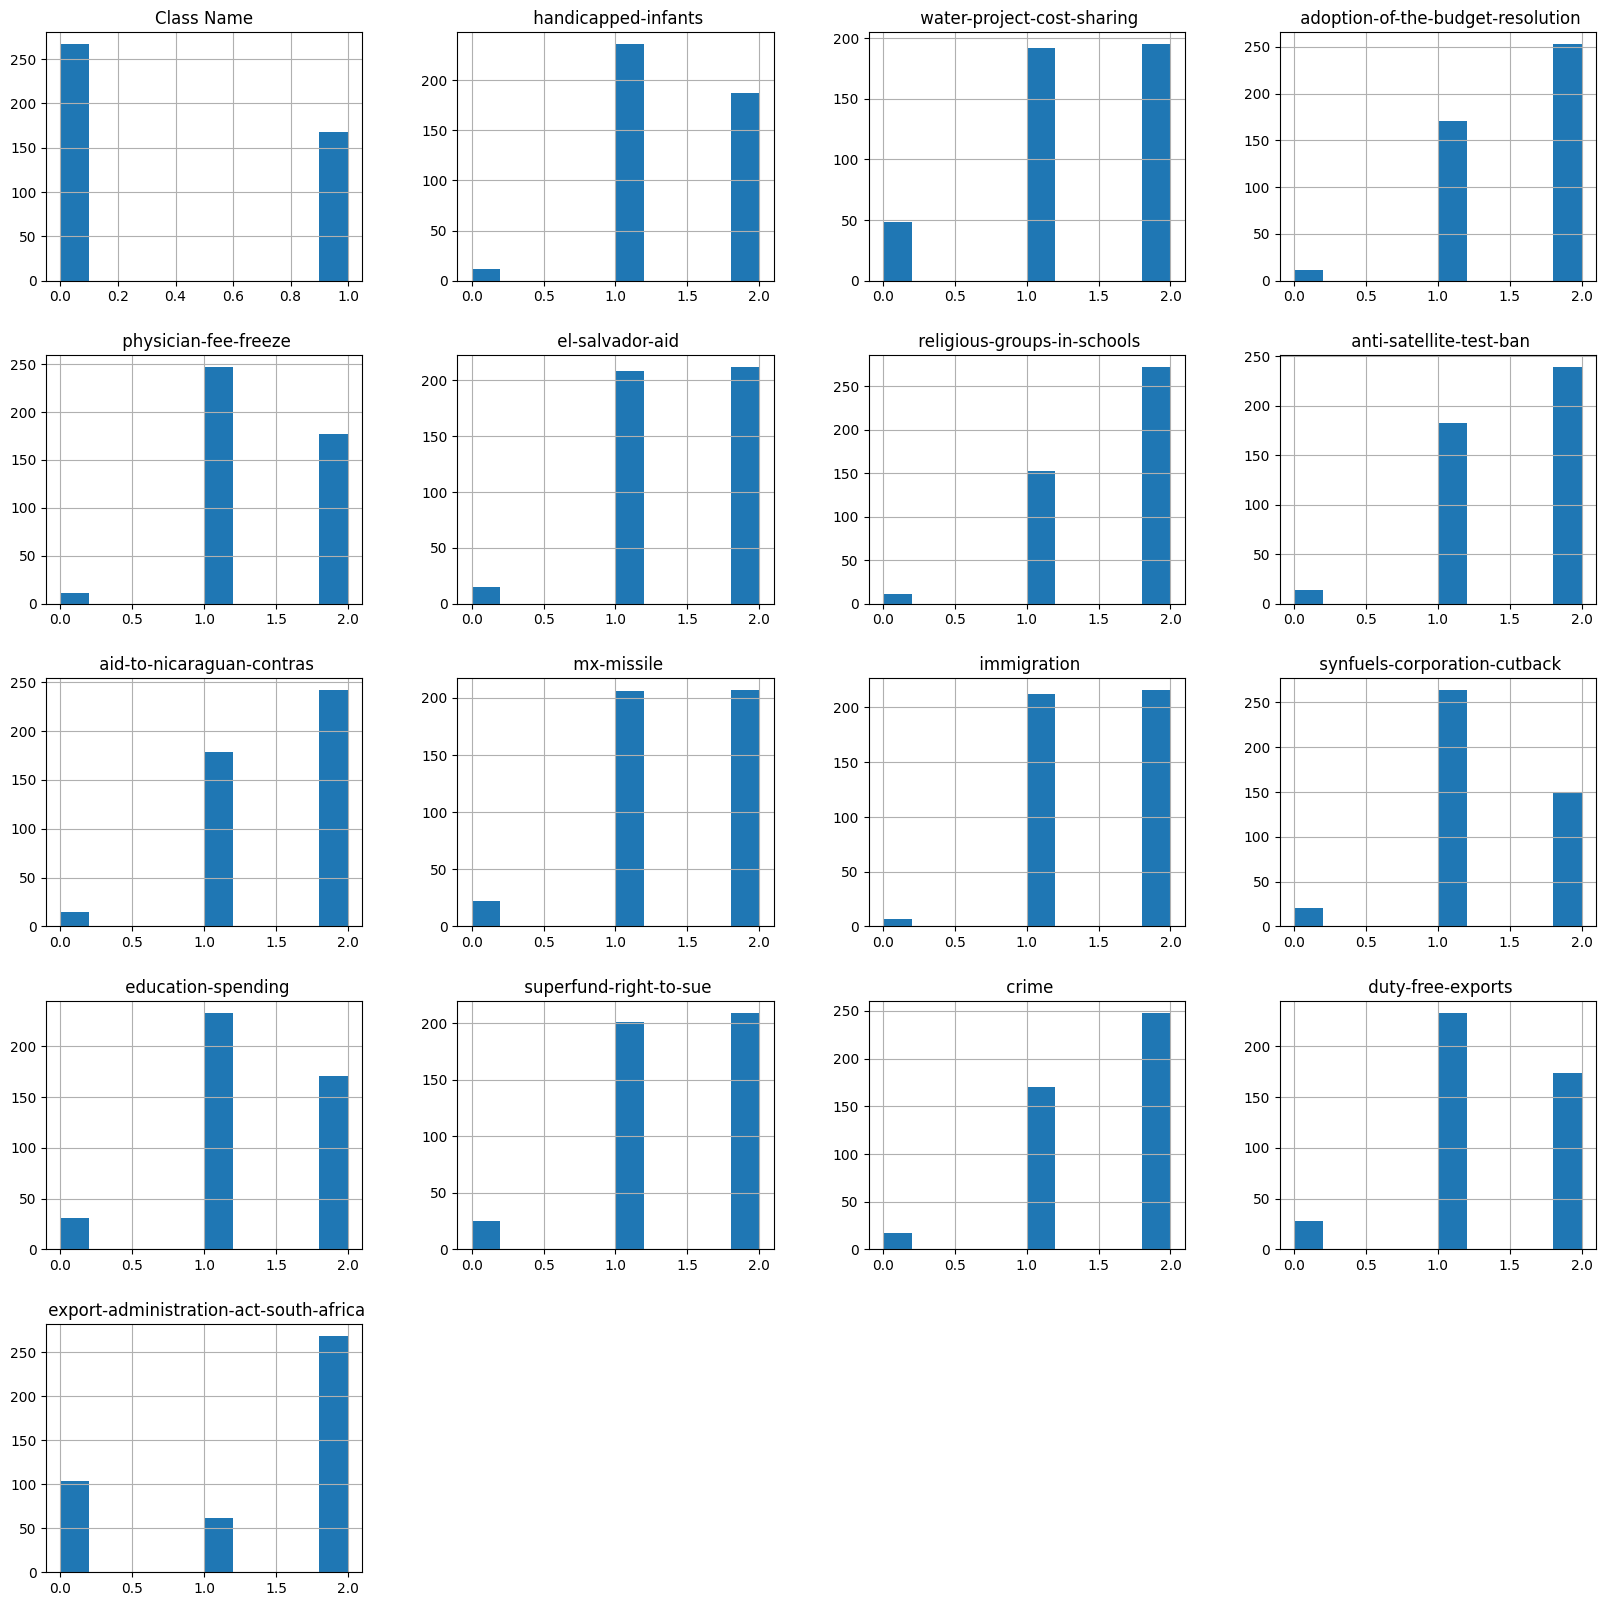

In [16]:
df.iloc[:,:].hist(figsize=(20,20))

plt.show()

In [17]:
x = df.drop('Class Name', axis=1).values
y = df['Class Name'].values

print(x.shape)
print(y.shape)

(435, 16)
(435,)


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, stratify= None, random_state=0)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(304, 16)
(131, 16)
(304,)
(131,)


# **Model**

In [20]:
def build_and_eval_model(clf):

    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify= None, random_state=0)

    model = clf
    # Đánh giá mô hình bằng Kiểm chứng chéo trên Training Set
    scoring = ['accuracy', 'precision', 'recall', 'f1']

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(model, x_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]

    print('I. Cross Validation on Training Set')
    print(cv_scores.describe())

    # Huấn luyện mô hình
    model.fit(x_train, y_train)

    # Dùng mô hình dự đoán trên Test Set
    y_pred = model.predict(x_test)

    # Đánh giá kết quả dự đoán của mô hình trên Test Set
    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred)],
                                 'recall': [recall_score(y_test, y_pred)],
                                 'f1': [f1_score(y_test, y_pred)]})
    
    print('II. Final Validation on Test Set')
    print(final_scores.to_string(index=False))

    # Trực quan hóa kết quả đánh giá
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='none', cmap='Blues')
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, z, ha='center', va='center')
    plt.xlabel("Cluster label")
    plt.ylabel("True label")
    plt.show()

    # Lưu kết quả đánh giá
    cv_scores.to_csv('/content/gdrive/MyDrive/NLU/MayHoc/Document/GiuaKi/{}_cv_scores.csv'.format(clf.__class__.__name__), index=False)
    final_scores.to_csv('/content/gdrive/MyDrive/NLU/MayHoc/Document/GiuaKi/{}_final_scores.csv'.format(clf.__class__.__name__), index=False)

# **SVM**

In [21]:
# Using SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}

svm_class = SVC()

grid_svm_class = GridSearchCV(estimator=svm_class, param_grid= param_grid, scoring='accuracy', n_jobs=4, cv=10, refit=True, return_train_score=True)

grid_svm_class.fit(x_train,y_train)
y_pred = grid_svm_class.predict(x_test)

print(grid_svm_class.best_params_)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.9541984732824428
0.9486904761904762
0.9587390457643622
0.9527417027417027


BUILD AND EVALUATE SVM MODEL
I. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.951749        0.917694     0.962681   0.938720
std         0.027441        0.053626     0.035893   0.034486
min         0.916667        0.846154     0.913043   0.893617
25%         0.926230        0.882308     0.936594   0.905501
50%         0.950820        0.913043     0.956522   0.938776
75%         0.975273        0.957273     1.000000   0.968056
max         1.000000        1.000000     1.000000   1.000000
II. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.954198   0.910714 0.980769 0.944444


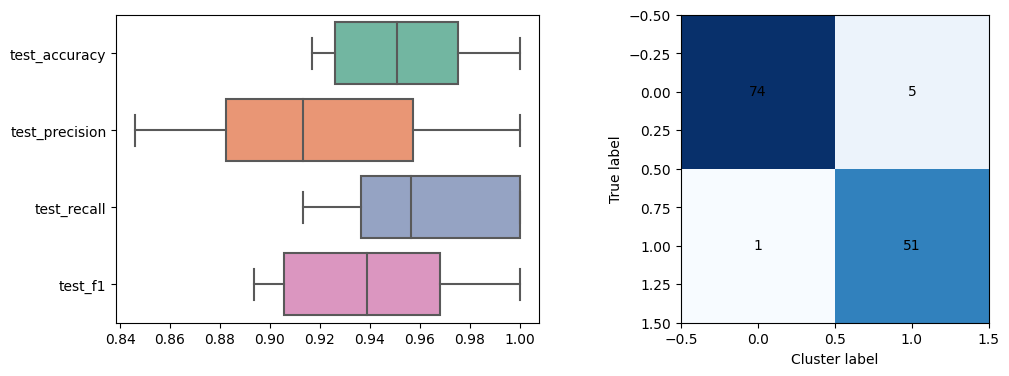

In [25]:
print('BUILD AND EVALUATE SVM MODEL')
clf = SVC(C= 10, gamma= 0.01, kernel='rbf')
build_and_eval_model(clf)

# **LogisticRegression**

BUILD AND EVALUATE LOGISTIC REGRESSION MODEL
I. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.939690        0.919774     0.925604   0.920853
std         0.020315        0.039249     0.058832   0.028416
min         0.901639        0.851852     0.791667   0.863636
25%         0.925683        0.894545     0.913043   0.903330
50%         0.934426        0.916667     0.956522   0.920000
75%         0.950820        0.955534     0.956522   0.936170
max         0.967213        0.958333     1.000000   0.958333
II. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.938931   0.907407 0.942308 0.924528


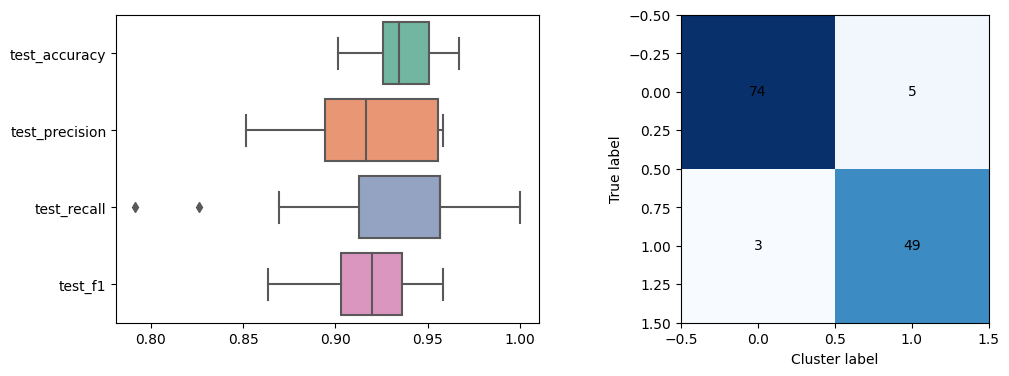

In [26]:
print('BUILD AND EVALUATE LOGISTIC REGRESSION MODEL')
clf = LogisticRegression(max_iter=1000)
build_and_eval_model(clf)

# **DecisionTreeClassifier**

I. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.957250        0.928275     0.965459   0.945571
std         0.027675        0.055324     0.033617   0.034768
min         0.916667        0.846154     0.913043   0.893617
25%         0.934426        0.884615     0.956522   0.916522
50%         0.967213        0.920000     0.958333   0.958333
75%         0.983333        0.980000     1.000000   0.977778
max         1.000000        1.000000     1.000000   1.000000
II. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.954198   0.910714 0.980769 0.944444


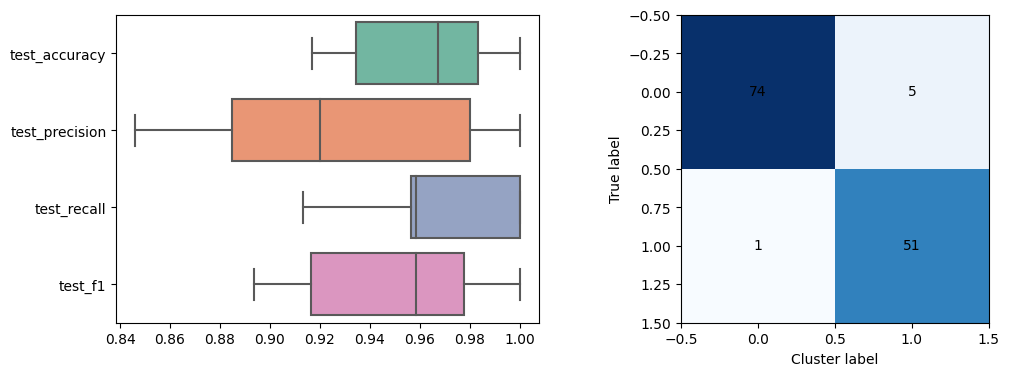

In [27]:
clf = DecisionTreeClassifier(min_samples_leaf= 10, min_samples_split= 17, random_state=1)
build_and_eval_model(clf)

# **GaussianNB**

I. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.918871        0.882861     0.914130   0.896668
std         0.042309        0.074174     0.055482   0.052937
min         0.836066        0.785714     0.791667   0.791667
25%         0.885246        0.833333     0.869565   0.856904
50%         0.918033        0.851852     0.913043   0.897959
75%         0.950820        0.954545     0.956522   0.933333
max         1.000000        1.000000     1.000000   1.000000
II. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.900763   0.830508 0.942308 0.882883


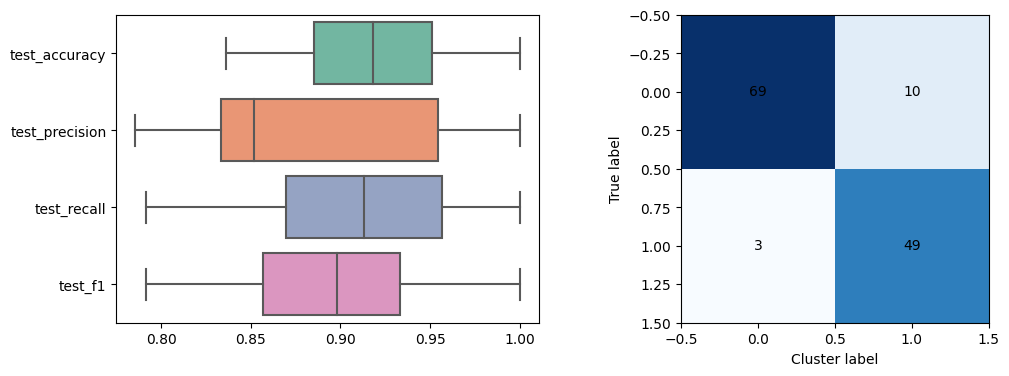

In [28]:
clf = GaussianNB()
build_and_eval_model(clf)

# **RandomForestClassifier**

In [ ]:
#RandomForest
param_grid = {
    'n_estimators': [25, 50, 100, 150,300,500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'criterion' :['gini', 'entropy']
}

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, stratify= y, random_state=0)

rf_class = RandomForestClassifier(random_state=0)

grid_rf_class = GridSearchCV(estimator=rf_class, param_grid= param_grid, scoring='accuracy', n_jobs=4, cv=10, refit=True, return_train_score=True)

grid_rf_class.fit(x_train,y_train)
y_pred = grid_rf_class.predict(x_test)

print(grid_rf_class.best_params_)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

{'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 6, 'n_estimators': 50}
0.9312977099236641
0.932605421686747
0.9224264705882352
0.9269380925822643


BUILD AND EVALUATE RANDOM FOREST MODEL
I. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.956157        0.927905     0.962681   0.943974
std         0.024636        0.050655     0.035893   0.030975
min         0.916667        0.846154     0.913043   0.897959
25%         0.934426        0.898829     0.936594   0.914855
50%         0.950820        0.920000     0.956522   0.938776
75%         0.983333        0.958333     1.000000   0.977778
max         0.983607        1.000000     1.000000   0.978723
II. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.961832   0.927273 0.980769 0.953271


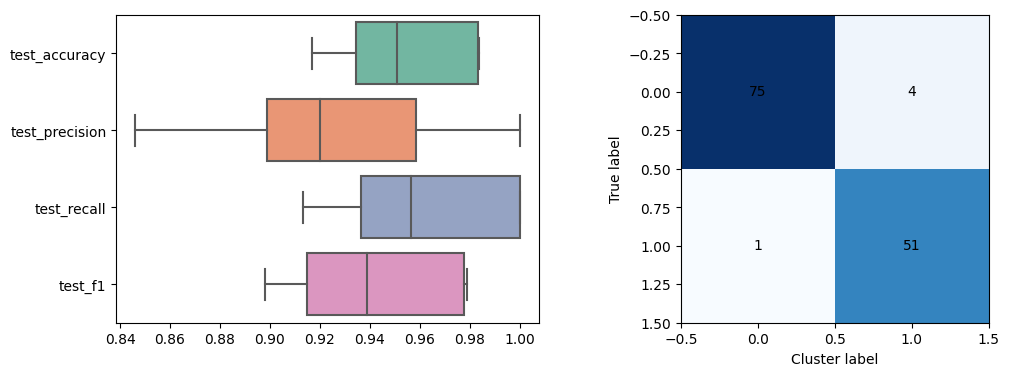

In [35]:
print('BUILD AND EVALUATE RANDOM FOREST MODEL')
clf = RandomForestClassifier(random_state=0, criterion='entropy', max_depth= 6, max_features= None, max_leaf_nodes= 6, n_estimators=50)
build_and_eval_model(clf)

# **K-nn**

In [39]:
#KNeighborsClassifier
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, stratify= y, random_state=0)

knn_class =  KNeighborsClassifier(n_neighbors = 10)

grid_knn_class = GridSearchCV(estimator=knn_class, param_grid= grid_params, scoring='accuracy', n_jobs=4, cv=10, refit=True, return_train_score=True)

grid_knn_class.fit(x_train,y_train)
y_pred = grid_knn_class.predict(x_test)

print(grid_knn_class.best_params_)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
0.9236641221374046
0.9177552007740687
0.9232843137254902
0.9202775073028238


BUILD AND EVALUATE k-NN MODEL
I. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.914517        0.848521     0.948792   0.895255
std         0.025620        0.042672     0.032969   0.030899
min         0.852459        0.750000     0.913043   0.823529
25%         0.909016        0.818122     0.916667   0.888980
50%         0.918033        0.851852     0.956522   0.897959
75%         0.925683        0.880000     0.958333   0.909314
max         0.950820        0.916667     1.000000   0.941176
II. Final Validation on Test Set
 accuracy  precision   recall       f1
 0.923664   0.886792 0.921569 0.903846


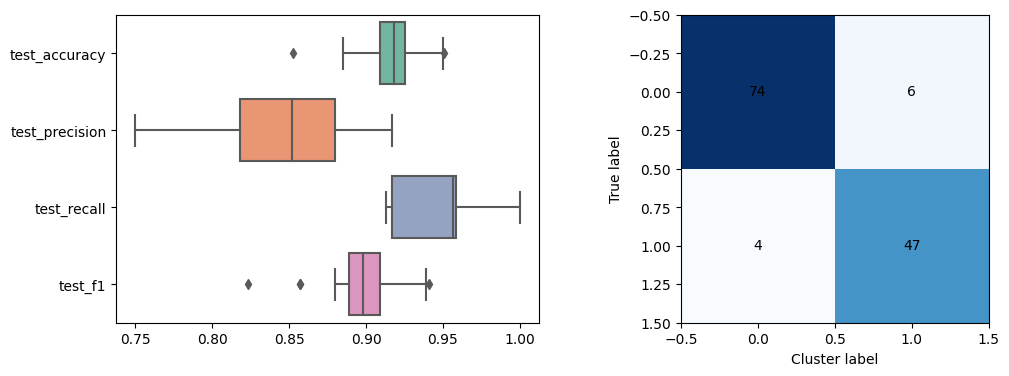

In [40]:
print('BUILD AND EVALUATE k-NN MODEL')
clf = KNeighborsClassifier(metric='manhattan', n_neighbors= 11, weights= 'uniform')
build_and_eval_model(clf)

# **Neuron Network**

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, stratify= y, random_state=0)

neuron_class = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(250, 100), random_state=1)

grid_mpl_class = GridSearchCV(estimator= neuron_class, param_grid=parameter_space, scoring='accuracy', n_jobs=4, cv=10, refit=True, return_train_score=True)

grid_mpl_class.fit(x_train,y_train)
y_pred = grid_mpl_class.predict(x_test)

print(grid_mpl_class.best_params_)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.9312977099236641
0.9370843989769821
0.9188725490196079
0.9263355201499531


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



BUILD AND EVALUATE Neuron network MODEL
I. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.952878        0.942083     0.937198   0.938373
std         0.014945        0.033377     0.045839   0.020446
min         0.934426        0.851852     0.826087   0.904762
25%         0.942213        0.920000     0.916667   0.926667
50%         0.950820        0.956522     0.956522   0.936170
75%         0.966667        0.956522     0.957428   0.956522
max         0.983607        1.000000     1.000000   0.979592
II. Final Validation on Test Set
 accuracy  precision   recall  f1
 0.923664   0.918367 0.882353 0.9


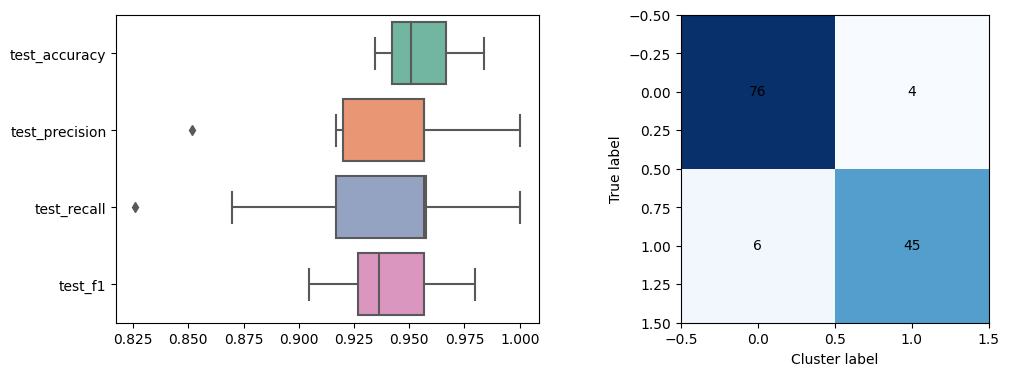

In [42]:
print('BUILD AND EVALUATE Neuron network MODEL')
clf =  MLPClassifier(activation='relu', alpha= 0.05, hidden_layer_sizes=(50, 100, 50), learning_rate='constant', solver= 'adam')
build_and_eval_model(clf)

# **DeepLearning**

In [44]:
def buildModel(optimizer):
    # Initialising the ANN
    classifier = Sequential()
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 128, activation = 'relu'))
    
    # Adding the second hidden layer
    classifier.add(Dense(units = 64, activation = 'relu'))
    classifier.add(Dense(units = 32, activation = 'relu'))
  
    # Adding the output layer
    classifier.add(Dense(units = 1, activation = 'linear'))
    
    # Compiling the ANN
    classifier.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return classifier

In [45]:
param_grid = {'batch_size': [16, 32, 64, 128],
              'epochs': [100, 150],
              'optimizer': ['adam', 'rmsprop']}

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, stratify= y, random_state=0)

keras_class = KerasClassifier(build_fn = buildModel)

grid_keras_class = GridSearchCV(estimator = keras_class, param_grid = param_grid, scoring = 'neg_mean_absolute_error',  cv = 5)
grid_keras_class.fit(x_train, y_train, verbose = 0)
y_pred = grid_keras_class.predict(x_test)

print(grid_keras_class.best_params_)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

<ipython-input-45-4af62a60ab0f>:7: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



2/2 [==============================] - 0s 6ms/step


2/2 [==============================] - 0s 10ms/step


5/5 [==============================] - 0s 3ms/step
{'batch_size': 128, 'epochs': 150, 'optimizer': 'rmsprop'}
0.6106870229007634
0.3053435114503817
0.5
0.3791469194312796


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



BUILD AND EVALUATE Neuron network MODEL


<ipython-input-46-9960d255403b>:2: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



I. Cross Validation on Training Set
       test_accuracy  test_precision  test_recall    test_f1
count      15.000000       15.000000    15.000000  15.000000
mean        0.858907        0.694527     0.673551   0.682507
std         0.153681        0.435238     0.423271   0.426852
min         0.606557        0.000000     0.000000   0.000000
25%         0.770492        0.437500     0.395833   0.441860
50%         0.934426        0.916667     0.913043   0.913043
75%         0.950820        0.978261     0.956522   0.938776
max         0.983607        1.000000     0.958333   0.977778
Epoch 1/150
5/5 [==============================] - 2s 4ms/step - loss: 2.2573 - accuracy: 0.5493
Epoch 2/150
5/5 [==============================] - 0s 4ms/step - loss: 0.3671 - accuracy: 0.8454
Epoch 3/150
5/5 [==============================] - 0s 3ms/step - loss: 0.2279 - accuracy: 0.9243
Epoch 4/150
5/5 [==============================] - 0s 3ms/step - loss: 0.2381 - accuracy: 0.9145
Epoch 5/150
5/5 [==========

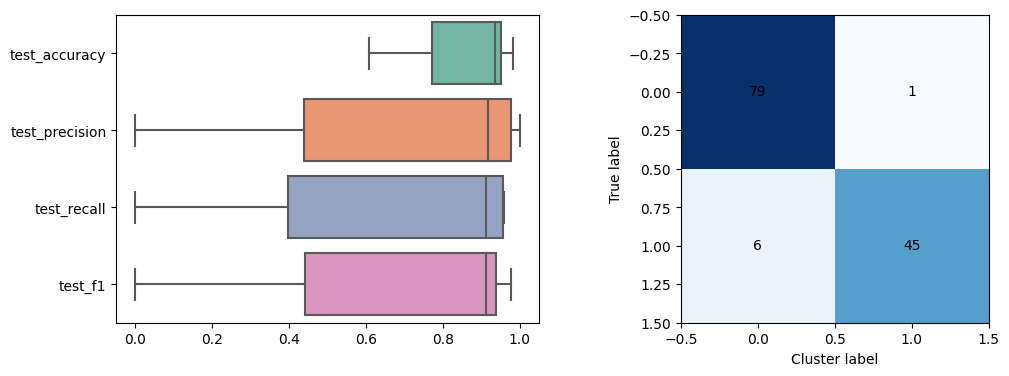

In [46]:
print('BUILD AND EVALUATE Neuron network MODEL')
clf = KerasClassifier(build_fn = buildModel, batch_size= 64, epochs= 150, optimizer= 'rmsprop')
build_and_eval_model(clf)

# **Kết Luận**

In [47]:
clf_names = ['SVC','LogisticRegression','DecisionTreeClassifier','GaussianNB','RandomForestClassifier','KNeighborsClassifier','MLPClassifier','KerasClassifier']
score_names = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']

In [48]:
def build_plots(title):
    model_cv_scores = {clf_name: pd.read_csv('/content/gdrive/MyDrive/NLU/MayHoc/Document/GiuaKi/{}_cv_scores.csv'.format(clf_name)) for clf_name in clf_names}

    fig, axs = plt.subplots(2,2, figsize=(12,6))

    for score_name, ax in zip(score_names, axs.flat):
        score_data = pd.DataFrame({clf_name: model_cv_scores[clf_name][score_name] for clf_name in clf_names})
        sns.boxplot(data = score_data, orient="h", palette="Set2", ax=ax)
        ax.set_title(score_name)
    
    fig.suptitle(title)
    plt.tight_layout()

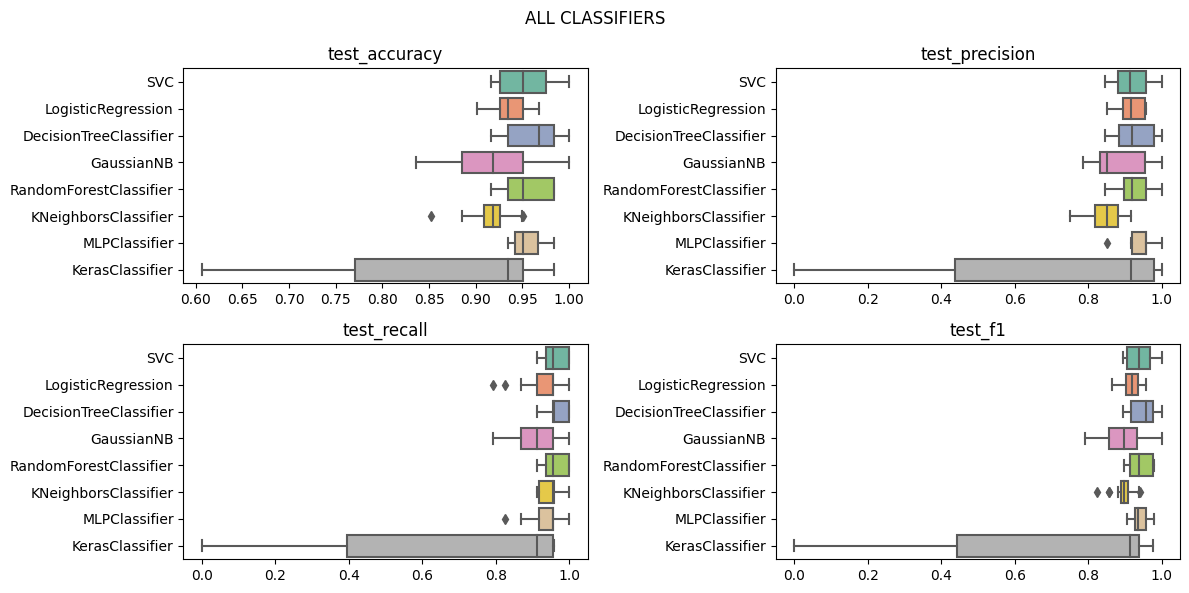

In [49]:
build_plots('ALL CLASSIFIERS')